<a href="https://colab.research.google.com/github/Chandigarh-University-students/Devanagri-Text-Classifier/blob/main/Devanagri2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import os

In [4]:
from PIL import Image


In [5]:
IMG_WIDTH=32
IMG_HEIGHT=32


In [15]:
def create_dataset_PIL(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

In [7]:
img_train_folder = '/content/drive/MyDrive/Devanagri dataset/DevanagariHandwrittenCharacterDataset/Train'

In [16]:
PIL_train_img_data, train_class_name=create_dataset_PIL(img_train_folder)


In [17]:
print(PIL_train_img_data[0])

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.02745098 0.09019608]
  [0.03529412 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.18039216]
  [0.8862745  1.         0.7647059 ]
  [0.09019608 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.1764706 ]
  [0.9411765  1.         0.99607843]
  ...
  [1.         0.99607843 0.89411765]
  [0.7137255  0.4392157  0.15294118]
  [0.02745098 0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [20]:
len(PIL_train_img_data)

7518

In [21]:
len(PIL_train_img_data[0])

32

In [22]:
len(PIL_train_img_data[0][0])

32

In [23]:
len(PIL_train_img_data[0][0][0])

3

In [25]:
import tensorflow as tf
from matplotlib import pyplot as plt

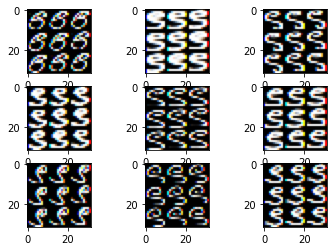

In [41]:
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(PIL_train_img_data[i+1000])

digit_5
(32, 32)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09803922 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


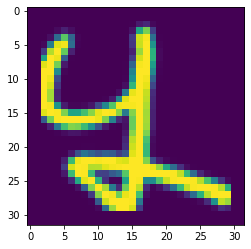

In [99]:
dir1=os.listdir(img_train_folder)[0]
img_folder=img_train_folder
print(dir1)
file=os.listdir(os.path.join(img_folder, dir1))[0]
image_path= os.path.join(img_folder, dir1,  file)
image= np.array(Image.open(image_path))
print(image.shape)
image = image.astype('float32')
image /= 255  
print(image)
plt.subplot(111)
plt.imshow(image)

In [69]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32,32)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(46, activation=tf.nn.softmax)])

7518

In [68]:
len(os.listdir(img_train_folder))

46

In [71]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
model.fit(imageArr, label , epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 318ms/step - loss: 3.6514 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 2.7935 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 2.1026 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 1.5458 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 1.0994 - accuracy: 1.0000


In [76]:
train_class_name[0]

'digit_5'

In [81]:
print(type(image))
print(type(train_class_name))

<class 'numpy.ndarray'>
<class 'list'>


In [96]:
label=np.array([5])
imageArr=np.array([image])
print(type(label))
print(label.shape)
print(imageArr.shape)

<class 'numpy.ndarray'>
(1,)
(1, 32, 32)


In [95]:
type(train_class_name[0])

str

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
5


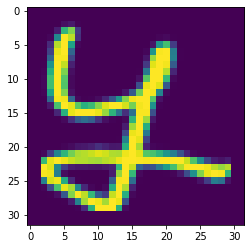

In [100]:
file2=os.listdir(os.path.join(img_folder, dir1))[2]
image_path2= os.path.join(img_folder, dir1,  file2)
image2= np.array(Image.open(image_path2))
image2 = image2.astype('float32')
image2 /= 255  
print(image2)
plt.subplot(111)
plt.imshow(image2)

prediction=model.predict(np.array([image2]))
print(np.argmax(prediction[0]))